Data read error! <type 'exceptions.AttributeError'>


C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


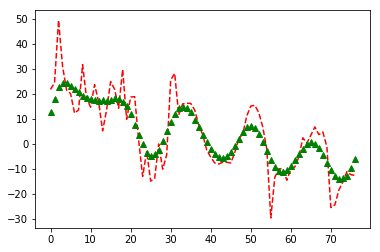

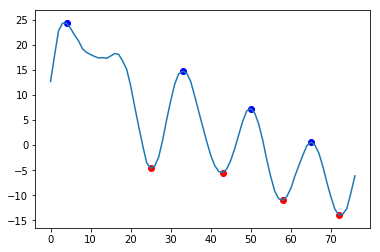

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:191: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
import math as m
import csv
from numpy import linspace, loadtxt, ones, convolve, NaN, Inf, arange, isscalar, asarray, array
from __future__ import division

#Moving Mean
def movingaverage(interval, window_size):
    try:
        window = np.ones(int(window_size))/float(window_size)
        return np.convolve(interval, window, 'same')
    except:
        print "[moving average error!]", sys.exc_info()[0]

#Peak detect
def peakdet(v, delta, x = None):
    """
    Converted from MATLAB script at http://billauer.co.il/peakdet.html
    
    Returns two arrays
    
    function [maxtab, mintab]=peakdet(v, delta, x)
    %PEAKDET Detect peaks in a vector
    %        [MAXTAB, MINTAB] = PEAKDET(V, DELTA) finds the local
    %        maxima and minima ("peaks") in the vector V.
    %        MAXTAB and MINTAB consists of two columns. Column 1
    %        contains indices in V, and column 2 the found values.
    %      
    %        With [MAXTAB, MINTAB] = PEAKDET(V, DELTA, X) the indices
    %        in MAXTAB and MINTAB are replaced with the corresponding
    %        X-values.
    %
    %        A point is considered a maximum peak if it has the maximal
    %        value, and was preceded (to the left) by a value lower by
    %        DELTA.
    
    % Eli Billauer, 3.4.05 (Explicitly not copyrighted).
    % This function is released to the public domain; Any use is allowed.
    
    """
    maxtab = []
    mintab = []
       
    if x is None:
        x = arange(len(v))
    
    v = asarray(v)
    
    if len(v) != len(x):
        sys.exit('Input vectors v and x must have same length')
    
    if not isscalar(delta):
        sys.exit('Input argument delta must be a scalar')
    
    if delta <= 0:
        sys.exit('Input argument delta must be positive')
    
    mn, mx = Inf, -Inf
    mnpos, mxpos = NaN, NaN
    
    lookformax = True
    
    for i in arange(len(v)):
        this = v[i]
        if this > mx:
            mx = this
            mxpos = x[i]
        if this < mn:
            mn = this
            mnpos = x[i]
        
        if lookformax:
            if this < mx-delta:
                maxtab.append((mxpos, mx))
                mn = this
                mnpos = x[i]
                lookformax = False
        else:
            if this > mn+delta:
                mintab.append((mnpos, mn))
                mx = this
                mxpos = x[i]
                lookformax = True

    return array(maxtab), array(mintab)

#trial = "9"
path = "C:\\Users\\Shradha Shalini\\Documents\\PT_Data_Collection\\Subject_test\\091317\\26_FourMeterWalkStandStill\\4"
#path = "C:\\Users\\Shradha Shalini\\Documents\\Kinect2Sample-master\\sample\\build2\\Depth\\"+trial
#C:\Users\Shradha Shalini\Documents\Kinect2Sample-master\sample\build2\Depth\9

try:
    #Get and process centroid
    centroid_data=pd.read_csv(path+"\\centroids.csv")
    centroids = centroid_data;
    centroids.columns = ['x','y','z']

    #Get and process time
    centroid_time=pd.read_csv(path+"\\centroids_time.csv")
    centroid_time.columns = ['hour','min','sec','milis']

    if type(centroids['z'][0]) == str:
        #Select the right length of time for 4 meters
        centroid_time = centroid_time.loc[(centroids['z'] <= '6') & (centroids['z'] >= '2')]

        #Select centroids with in 4 meters of interest
        centroids = centroids.loc[(centroids['z'] <= '6') & (centroids['z'] >= '2')]
    else:
        #Select the right length of time for 4 meters
        centroid_time = centroid_time.loc[(centroids['z'] <= 6) & (centroids['z'] >= 2)]

        #Select centroids with in 4 meters of interest
        centroids = centroids.loc[(centroids['z'] <= 6) & (centroids['z'] >= 2)]

    plt.plot(centroids['z'], centroids['x'])
    plt.show()

    ##Get the time series time data
    time=[]
    for i in centroids.index:
        time.append((centroid_time.ix[i,'min'])*60+(centroid_time.ix[i,'sec'])+centroid_time.ix[i,'milis']*0.001)
    time= time-time[0]

    #Get all foot prints
    F=[]
    for i in centroids.index:
        if i!=0:
            string=path
            string+="\\"+str(i)+".csv"
            F.append(pd.read_csv(string, skiprows=[0]))
except:
    print "Data read error!", sys.exc_info()[0]
            
try:
    corr=[]
    for i in range(0, len(centroids['x'])-1, 1):
        ##Convert to inches
        steps =F[i]*39.3701;
        steps.columns=['x','y','z']
        steps['z']= steps['z']*-1

        ##Find Mean of data
        steps['x']=steps['x']-steps['x'].mean()
        steps['z']=steps['z']-steps['z'].mean()
        Foot = steps[['x','z']]


        newArray = pd.DataFrame([[0, 0]], columns=list('xz'))
        counter=0;

        newArray= Foot.loc[abs(Foot['x'])<25,:]

        newArray['x']=newArray['x']-newArray['x'].mean()
        newArray['z']=newArray['z']-newArray['z'].mean()

        ##Find correlation
        M = newArray['x']*newArray['z']
        try:
            corr.append(sum(M)/len(newArray)) 
        except ZeroDivisionError:
            corr.append(0) 
except:
    print "IndexError", sys.exc_info()[0]

try:    
    corr_av= movingaverage(corr, 7)
    corr_av= movingaverage(corr_av, 5)
    plt.plot(corr,'r--',corr_av,'g^')
    plt.show()

    maxtab_wt, mintab_wt = peakdet(corr_av,1)
    plt.plot(corr_av)
    plt.scatter(array(maxtab_wt)[:,0], array(maxtab_wt)[:,1], color='blue')
    plt.scatter(array(mintab_wt)[:,0], array(mintab_wt)[:,1], color='red')
    plt.show()

    #Start end frames for time
    if(maxtab_wt[0][0]<mintab_wt[0][0]):
        time_start=maxtab_wt[0][0];
    else:
        time_start=mintab_wt[0][0];

    if(maxtab_wt[len(maxtab_wt)-1][0]>mintab_wt[len(mintab_wt)-1][0]):
        time_end=maxtab_wt[len(maxtab_wt)-1][0];
    else:
        time_end=mintab_wt[len(mintab_wt)-1][0];

    time_walk= time[time_start:time_end];


    #For number of steps see if the first point is a hight point or last point a high point. They should not be considered.
    noSteps = 0
    if maxtab_wt[0][0]==0.0:
        noSteps += 1
    if mintab_wt[-1][0]==len(corr_av):
        noSteps += 1

    timeOfCompletion = time_walk[len(time_walk)-1]-time_walk[0]
    numberOfSteps = len(maxtab_wt)+len(mintab_wt)-noSteps
    gait_speed = 4.0/timeOfCompletion
    avg_step_length = 4.0/numberOfSteps
    cadance = numberOfSteps/4

except:
    print "Data Analysis Error!", sys.exc_info()[0]

try:
    #output
    with open('FourMWalkResultsPython.csv', 'w') as csvfile:
        fieldnames = ['timeOfCompletion(s)', 'numberOfSteps','gait_speed(m/s)','avg_step_length(m)','cadance']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

        writer.writeheader()
        writer.writerow({ 'timeOfCompletion(s)': timeOfCompletion, 'numberOfSteps':numberOfSteps, 'gait_speed(m/s)': gait_speed, 'avg_step_length(m)':avg_step_length, 'cadance':cadance})
except:
    print "Data save error!", sys.exc_info()[0]
